In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("../config/custom_plots.mplstyle")

Data from:

- https://prezydent20200628.pkw.gov.pl/prezydent20200628/pl/dane_w_arkuszach (second round of presidential election)
- https://www.gov.pl/web/szczepimysie/mapa-punktow-szczepien#/ (number of vaccinated)
- https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/ludnosc-stan-i-struktura-ludnosci-oraz-ruch-naturalny-w-przekroju-terytorialnym-stan-w-dniu-31-12-2020,6,29.html (population of powiat)

In [6]:
election_pow = pd.read_csv("../data/elections/wyniki_gl_na_kand_po_powiatach_utf8.csv", sep=";")
election_pow.head(2)

,Nr OKW,Kod TERYT,Powiat,Województwo,Komisje obwodowe otrzymały kart do głosowania,Liczba wyborców uprawnionych do głosowania,Nie wykorzystano kart do głosowania,"Liczba wyborców, którym wydano karty do głosowania",Liczba wyborców głosujących przez pełnomocnika,Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania,...,Liczba kart nieważnych,Liczba kart ważnych,Liczba głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI,Liczba obwodów
0,2,20100,bolesławiecki,dolnośląskie,63867,67800,21631,42238,13,633,...,1,42569,322,179,143,NaN,42247,20966,21281,63
1,4,20200,dzierżoniowski,dolnośląskie,73104,77836,24749,48353,54,878,...,4,48755,413,235,178,NaN,48342,24383,23959,83


In [7]:
election_woj = pd.read_csv("../data/elections/wyniki_gl_na_kand_po_wojewodztwach_utf8.csv", sep=";")
election_woj.head(2)

,Kod TERYT,Województwo,Komisje obwodowe otrzymały kart do głosowania,Liczba wyborców uprawnionych do głosowania,Nie wykorzystano kart do głosowania,"Liczba wyborców, którym wydano karty do głosowania",Liczba wyborców głosujących przez pełnomocnika,Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania,"Liczba wyborców, którym wysłano pakiety wyborcze",Liczba otrzymanych kopert zwrotnych,...,Liczba kart nieważnych,Liczba kart ważnych,Liczba głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI,Liczba obwodów
0,20000,dolnośląskie,2065241,2240376,578311,1487041,1334,41527,15246,14478,...,155,1500893,12953,7494,5459,NaN,1487940,663831,824109,1947
1,40000,kujawsko-pomorskie,1466205,1572933,446875,1019344,1001,21694,8605,8325,...,34,1027342,8142,4813,3329,NaN,1019200,476728,542472,1653


In [21]:
vaccination_pow = pd.read_csv("../data/vaccinations/aktualne_dane_szczepienia_pow.csv", sep=';', encoding='cp1250')
vaccination_pow.drop(index=0, inplace=True)
vaccination_pow.head(2)

,wojewodztwo,powiat_miasto,liczba_szczepien_ogolnie,liczba_szczepien_dziennie,dawka_2_ogolem,dawka_2_dziennie,teryt
1,dolnośląskie,bolesławiecki,62789,392,27434,278,t0201
2,dolnośląskie,dzierżoniowski,58178,537,25492,380,t0202


In [22]:
vaccination_woj = pd.read_csv("../data/vaccinations/aktualne_dane_szczepienia_woj.csv", sep=";", encoding='cp1250')
vaccination_woj.drop(index=0, inplace=True)
vaccination_woj.head(2)

,wojewodztwo,liczba_szczepien_ogolnie,liczba_szczepien_dziennie,dawka_2_ogolem,dawka_2_dziennie,teryt
1,dolnośląskie,2552227,19091,1136941,14696,t02
2,kujawsko-pomorskie,1666443,15742,725698,12660,t04


In [28]:
df_woj = pd.merge(vaccination_woj, election_woj, left_on='wojewodztwo', right_on='Województwo')
df_woj["pis_fraction"] =  df_woj["Andrzej Sebastian DUDA"] / (df_woj["Andrzej Sebastian DUDA"] + df_woj["Rafał Kazimierz TRZASKOWSKI"])
df_woj.head(2)

,wojewodztwo,liczba_szczepien_ogolnie,liczba_szczepien_dziennie,dawka_2_ogolem,dawka_2_dziennie,teryt,Kod TERYT,Województwo,Komisje obwodowe otrzymały kart do głosowania,Liczba wyborców uprawnionych do głosowania,...,Liczba kart ważnych,Liczba głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI,Liczba obwodów,pis_fraction
0,dolnośląskie,2552227,19091,1136941,14696,t02,20000,dolnośląskie,2065241,2240376,...,1500893,12953,7494,5459,NaN,1487940,663831,824109,1947,0.446141
1,kujawsko-pomorskie,1666443,15742,725698,12660,t04,40000,kujawsko-pomorskie,1466205,1572933,...,1027342,8142,4813,3329,NaN,1019200,476728,542472,1653,0.467747


Text(0.5, 0, 'Total number of vaccinated')

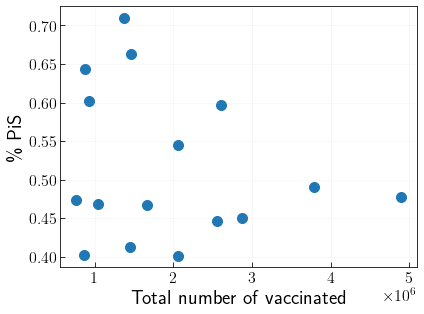

In [31]:
plt.scatter(df_woj.liczba_szczepien_ogolnie, df_woj["pis_fraction"])
plt.ylabel("\% PiS")
plt.xlabel("Total number of vaccinated")

In [32]:
from scipy.stats import spearmanr

spearmanr(df_woj.liczba_szczepien_ogolnie, df_woj.pis_fraction) # too small sample

SpearmanrResult(correlation=-0.07352941176470588, pvalue=0.7866792491258565)

0       bolesławiecki
1      dzierżoniowski
2           głogowski
3            górowski
4            jaworski
            ...      
375        świdwiński
376           wałecki
377          Koszalin
378          Szczecin
379       Świnoujście
Name: powiat, Length: 380, dtype: object

In [153]:
population_powiat = pd.read_excel("../data/people_powiat.xls")
population_powiat['powiat'] = population_powiat['powiat'].str.strip()

df_pow = pd.merge(vaccination_pow, election_pow, left_on='powiat_miasto', right_on='Powiat')
df_pow = pd.merge(df_pow, population_powiat, left_on='powiat_miasto', right_on='powiat')
df_pow = df_pow.drop_duplicates('powiat_miasto')


df_pow["pis_fraction"] =  df_pow["Andrzej Sebastian DUDA"] / (df_pow["Andrzej Sebastian DUDA"] + df_pow["Rafał Kazimierz TRZASKOWSKI"])
df_pow['vaccinated_fraction'] = df_pow['liczba_szczepien_dziennie'] / df_pow['liczba']
df_pow.head(2)

,wojewodztwo,powiat_miasto,liczba_szczepien_ogolnie,liczba_szczepien_dziennie,dawka_2_ogolem,dawka_2_dziennie,teryt,Nr OKW,Kod TERYT,Powiat,...,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI,Liczba obwodów,powiat,liczba,pis_fraction,vaccinated_fraction
0,dolnośląskie,bolesławiecki,62789,392,27434,278,t0201,2,20100,bolesławiecki,...,143,NaN,42247,20966,21281,63,bolesławiecki,89762,0.496272,0.004367
1,dolnośląskie,dzierżoniowski,58178,537,25492,380,t0202,4,20200,dzierżoniowski,...,178,NaN,48342,24383,23959,83,dzierżoniowski,99935,0.504385,0.005373


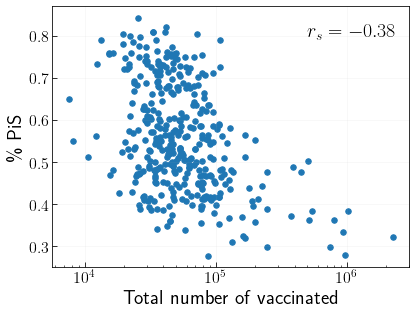

In [173]:
plt.scatter(df_pow.liczba_szczepien_ogolnie, df_pow["pis_fraction"], marker='o', s=30)

corr = spearmanr(df_pow.liczba_szczepien_ogolnie, df_pow.pis_fraction).correlation

plt.text(5e5, 0.8, r'$r_s = {:.2f}$'.format(corr), fontsize=20)
plt.ylabel("\% PiS")
plt.xlabel("Total number of vaccinated")
plt.xscale('log')
# plt.savefig("../plots/pis_vs_vaccinated_powiat.pdf")

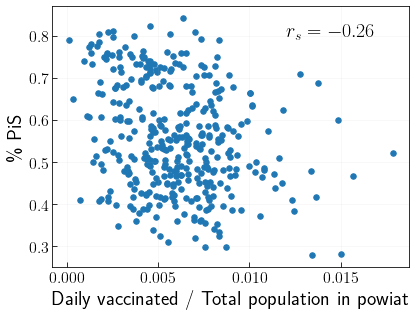

In [171]:
plt.scatter(df_pow['vaccinated_fraction'], df_pow["pis_fraction"], marker='o', s=30)

corr = spearmanr(df_pow['vaccinated_fraction'], df_pow.pis_fraction).correlation

plt.text(0.012, 0.8, r'$r_s = {:.2f}$'.format(corr), fontsize=20)
plt.ylabel("\% PiS")
plt.xlabel('Daily vaccinated / Total population in powiat')
# plt.savefig("../plots/pis_vs_vaccinated_powiat_rescaled.pdf")

In [172]:
df_pow[df_pow['vaccinated_fraction'] == df_pow['vaccinated_fraction'].max()]

,wojewodztwo,powiat_miasto,liczba_szczepien_ogolnie,liczba_szczepien_dziennie,dawka_2_ogolem,dawka_2_dziennie,teryt,Nr OKW,Kod TERYT,Powiat,...,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI,Liczba obwodów,powiat,liczba,pis_fraction,vaccinated_fraction
56,kujawsko-pomorskie,sępoleński,43694,730,19876,447,t0413,5,41300,sępoleński,...,38,NaN,18983,9882,9101,42,sępoleński,40826,0.520571,0.017881
